In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [56]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [61]:
train

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [99]:
len(train)

2048

In [4]:
test

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,P,1,2,1,1,0,0,0,2,...,0,1,3,0,3,0,4,3,1,4
20476,22525,S,4,1,1,4,0,0,1,1,...,1,3,1,0,0,1,3,1,2,0
20477,22526,B,4,2,1,3,2,1,3,0,...,3,2,3,4,1,0,3,3,1,1
20478,22527,K,1,1,2,3,4,0,4,3,...,2,0,0,4,3,3,3,4,4,2


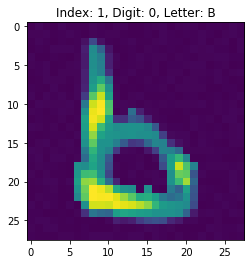

In [66]:
idx = 1
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int) #0부터 끝까지
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

In [67]:
img.shape

(28, 28)

###  특징값 더 밝게

In [100]:
for k in range(len(train)):
    img = train.loc[k, '0':].values.reshape(28, 28).astype(int) #0부터 끝까지
    digit = train.loc[k, 'digit']
    letter = train.loc[k, 'letter']

    for i in range(0,28):
        for j in range(0,28):
            if(img[i][j]<190): #밝은부분은 
                img[i][j]=0 #더 뚜렷하게
            else:
                img[i][j]=img[i][j] #나머지는 어둡게
    img=np.ravel(img, order='C') #2차원배열 1차원으로 
    # #train에 대입
    train.loc[k, '0':]=img #변화값 저장

In [102]:
train

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,B,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,4,L,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,9,D,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,6,A,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2044,2045,1,L,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2045,2046,9,A,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2046,2047,0,Z,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
train.to_csv('train_th=190.csv')

# train

In [105]:
train = pd.read_csv('train_th=190.csv')
train

,Unnamed: 0,id,digit,letter,0,1,2,3,4,5,...,774,775,776,777,778,779,780,781,782,783
0,0,1,5,L,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,B,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,4,L,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,9,D,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,6,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2043,2044,6,V,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2044,2044,2045,1,L,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2045,2045,2046,9,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2046,2046,2047,0,Z,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
x_train = train.drop(['Unnamed: 0','id', 'digit', 'letter'], axis=1).values  #화솟값
x_train = x_train.reshape(-1, 28, 28, 1)  #이미지갯수, 가로, 세로, 컬러
x_train = x_train/255  #화솟값정규화

#원핫인코딩
y = train['digit']
y_train = np.zeros((len(y), len(y.unique()))) #중복제거 유일한 원소 반환
for i, digit in enumerate(y):  #리스트가 있는 경우, 순서, 리스트값 전달
    #print(i) 는 0~
    #print(digit)  digit순서대로들어감.
    y_train[i, digit] = 1

In [110]:
x_train.shape

(2048, 28, 28, 1)

# cnn_model

In [ ]:
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:]) #x_train.shape[1:]=(28,28,1)
    
    #배치 정규화는 활성화함수 통과 전, 가중의 변화를 줄이는 것이 목표
    bn = tf.keras.layers.BatchNormalization()(inputs)
    
    #첫번째 인자= 컨볼루션 필터의 수 => 5*5 크기의 필터를 128개 사용.
    #stride 크기만큼 이미지 이동
    conv = tf.keras.layers.Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(bn)
    #출력결과: 1+(입력크기-필터크기)/stride 크기= 1+(28-5)/1=24
    
    bn = tf.keras.layers.BatchNormalization()(conv) 
    conv = tf.keras.layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    flatten = tf.keras.layers.Flatten()(pool)

    bn = tf.keras.layers.BatchNormalization()(flatten)
    #dense: Dense 레이어는 입력과 출력을 모두 연결해줌. relu와 주로 같이 쓰임.
    dense = tf.keras.layers.Dense(1000, activation='relu')(bn)
    
    bn = tf.keras.layers.BatchNormalization()(dense)
    
    #softmax: 가장 큰 출력값을 부여받은 클래스가 확률이 가장 높은것으로 이용
    outputs = tf.keras.layers.Dense(10, activation='softmax')(bn)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    return model

In [ ]:
model = create_cnn_model(x_train)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(x_train, y_train, epochs=100)